<a href="https://colab.research.google.com/github/PeanutSouth/AnalisisDeDatos-Tucci/blob/main/Tp-Helados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

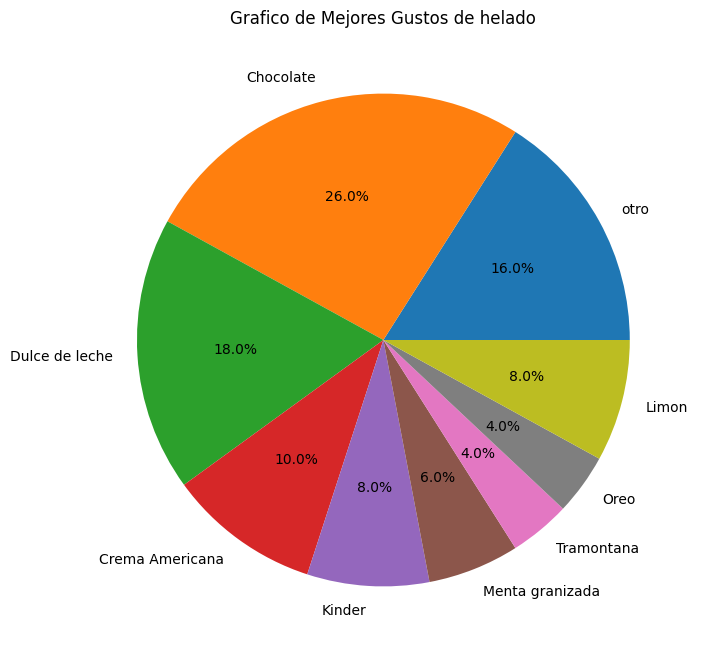

dict_keys(['1kg', 'Más de 1kg', '1/4kg', 'Cucurucho', '1/2kg', 'Vasito', 'Vasito chiquito'])


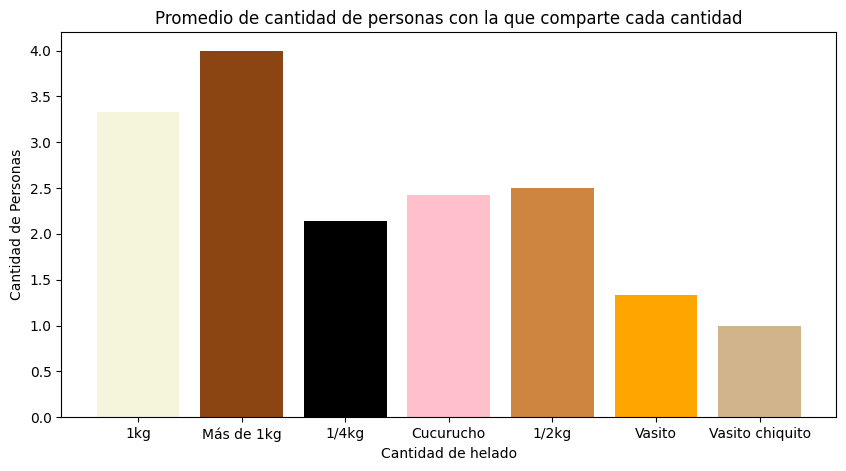

In [119]:
from re import A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def contar(valor):
    listaAux = valor.unique()
    mymap={}

    for value in listaAux:
      mymap[value] =  0

    for y in valor:
      for x in mymap:
        if y == x:
          mymap[x] += 1

    return mymap

def limpiar_gustos(valor):
   mymap = {}
   mymap["otro"] = 0
   for x in valor:
    if valor[x] > 1:
      mymap[x] = 0;
      mymap[x] += valor[x]
    else:
      mymap["otro"] += 1
   return mymap

def cantidad_y_personas(csv):
    listaAux = csv["Que cantidad soles comprar"].unique()
    mymap={}
    mymap2={}
    mymap3={}

    for value in listaAux:
      mymap[value] = 0
      mymap2[value] = 0
      mymap3[value] = 0

    for i in range(0 , 50):
      aux1 = csv["Con cuantas personas compartis el helado"][i]
      aux2 = csv["Que cantidad soles comprar"][i]

      if aux1 == "Más de 5":
        aux1 = 6
      else:
        aux1 = int(aux1)


      if aux2 == "Más de 1kg":
        mymap[aux2] += aux1
        mymap2[aux2] += 1
      elif aux2 == "1kg":
        mymap[aux2] += aux1
        mymap2[aux2] += 1
      elif aux2 == "1/2kg":
        mymap[aux2] += aux1
        mymap2[aux2] += 1
      elif aux2 == "1/4kg":
        mymap[aux2] += aux1
        mymap2[aux2] += 1
      elif aux2 == "Cucurucho":
        mymap[aux2] += aux1
        mymap2[aux2] += 1
      elif aux2 == "Vasito":
        mymap[aux2] += aux1
        mymap2[aux2] += 1
      elif aux2 ==  "Vasito chiquito":
        mymap[aux2] += aux1
        mymap2[aux2] += 1

    for x in mymap:
      mymap3[x] = mymap[x] / mymap2[x]
    return mymap3




csv = pd.read_csv("Encuesta.csv")

csv = csv.drop(columns=['Timestamp'],axis=1)

lista1 = contar(csv["Gusto Favorito"])
lista2 = contar(csv["Peor gusto"])
lista3 = contar(csv["Que cantidad soles comprar"])
lista4 = contar(csv["Con que frecuencia soles comprar por mes"])
lista5 = contar(csv["Con cuantas personas compartis el helado"])

a=csv["Que cantidad soles comprar"]
b = csv["Con cuantas personas compartis el helado"]

lista1=limpiar_gustos(lista1)
aux = cantidad_y_personas(csv)

#print(csv)

fig, ax = plt.subplots(figsize = [8,8])

ax.set_title("Grafico de Mejores Gustos de helado")
ax.pie(lista1.values(), labels=lista1.keys(), autopct='%1.1f%%')

plt.show()

fig, ax = plt.subplots(figsize = [10,5])

colors = ['beige', 'saddlebrown', 'black', 'pink', 'peru', 'orange', 'tan']
ax.bar(aux.keys(), aux.values(), color=colors)
ax.set_ylabel('Cantidad de Personas')
ax.set_xlabel('Cantidad de helado')
ax.set_title('Promedio de cantidad de personas con la que comparte cada cantidad')


print(aux.keys())
plt.show()


